# Homework 2
Use the PDF of the book with chapters 1-3 on Skogestad's website: https://folk.ntnu.no/skoge/book/ps/book1-3.pdf (otherwise Figure numbers might be off). See Class Materials  > references > skogestad2005_book_ch1-3.pdf

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as mt # MATLAB-like control toolbox functionality
%matplotlib notebook
#inline
#notebook

In [29]:
# Close all figures
plt.close('all')
# Define s
s = mt.tf('s')

## 2) Reproduce Figures 2.1, 2.2. What did you learn?


In [30]:
# Plant 
num_delay, den_delay = mt.pade(2, n=10)
G_delay = mt.tf(num_delay, den_delay)
G = 5 / (10*s + 1) * G_delay

<IPython.core.display.Javascript object>


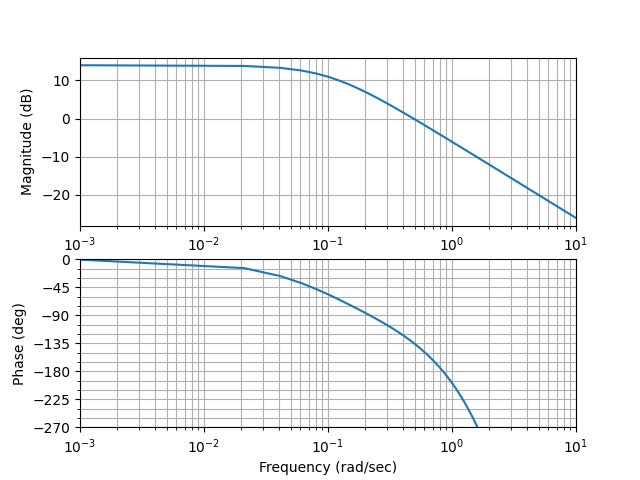

In [31]:
# Frequence response for G 

# Bode plot G
fig, ax = plt.subplots()
w = np.linspace(1e-3, 1e1, 500)
mt.bode(G, w)
plt.xlim(1e-3, 1e1)
plt.ylim(-270, 0);

Note:  
- $\omega$=0.2 rad/s, Magnitude = 6.8dB = 2.2, Phase=-90$^\circ$
- $\omega$=1 rad/s, Magnitude = -6.6dB = 0.5, Phase=-200$^\circ$


<IPython.core.display.Javascript object>


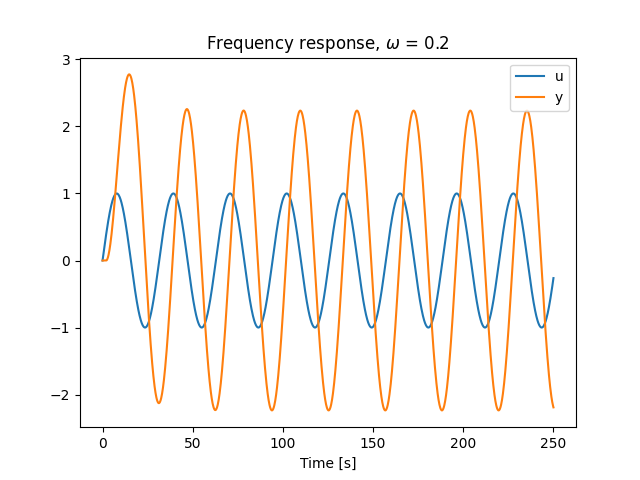

<IPython.core.display.Javascript object>


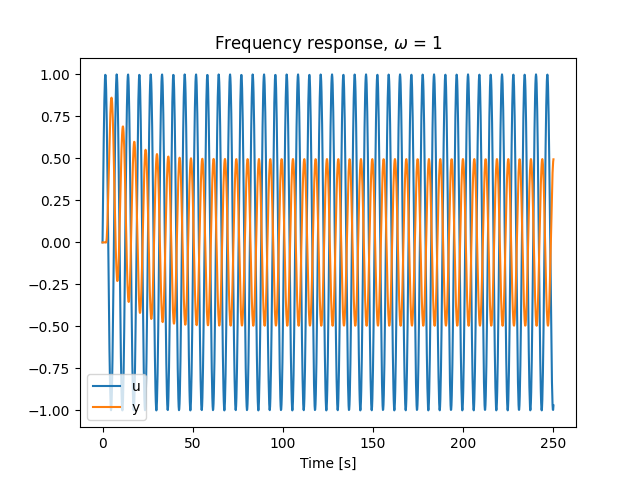

In [32]:
# Response for G at omega = 0.2 rad/s
t = np.linspace(0, 250, 1500)
omega = 0.2
u = np.sin(omega*t)
y, t, x = mt.lsim(G, u, t)
fig, ax = plt.subplots()
ax.plot(t, u, label='u')
ax.plot(t, y, label='y')
ax.set_xlabel('Time [s]')
ax.legend();
ax.set_title(r'Frequency response, $\omega$ = {}'.format(omega));

# Response for G at omega = 1 rad/s
omega = 1
u = np.sin(omega*t)
y, t, x = mt.lsim(G, u, t)
fig, ax = plt.subplots()
ax.plot(t, u, label='u')
ax.plot(t, y, label='y')
ax.set_xlabel('Time [s]')
ax.legend();
ax.set_title(r'Frequency response, $\omega$ = {}'.format(omega));


**We observe that the system goes through a transient before it settles at a constant amplitude / phase relationship: The latter relationship is depicted in the Bode plot. Make sure you can connect Bode plot magnitude and phase for given frequency with the responses.**

## 3) What did you learn from Example 2.1?


![title](img/block_diagram_amplifier.png)

## 4) What did you learn from Example 2.2. Reproduce corresponding Figure 2.6. Also plot the Nyquist plots for a stable and unstable gain. Then, use Nyquist criterium to deduce stability for both.

In [33]:
# Plant 
G = 3*(-2*s + 1)/((10*s + 1)*(5*s + 1))

<IPython.core.display.Javascript object>


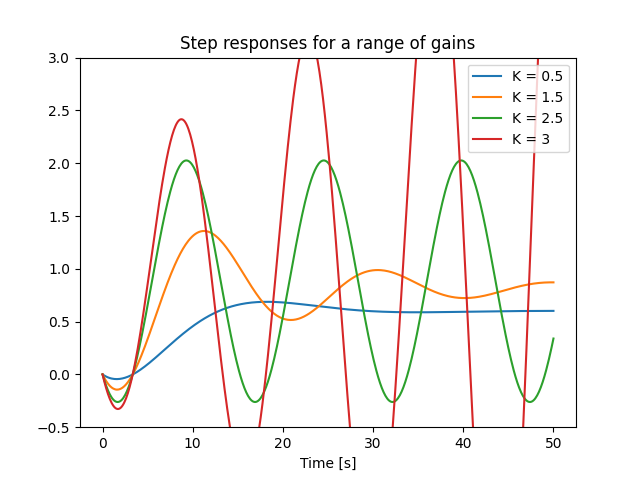

In [34]:
# Close loop with proportional control 
Kc = [0.5, 1.5, 2.5, 3]

# Plot responses
t = np.linspace(0, 50, 500)

fig, ax = plt.subplots()
for K in Kc:
    T = mt.feedback(G*K, 1)
    y, t = mt.step(T, t)
    # plot
    ax.plot(t, y, label='K = {}'.format(K))

ax.set_ylim(-0.5, 3)
ax.set_xlabel('Time [s]')
ax.legend();
ax.set_title('Step responses for a range of gains');

We see that the system goes unstable for Kc > 2.5. Kc=2.5 is the ultimate gain.

<IPython.core.display.Javascript object>


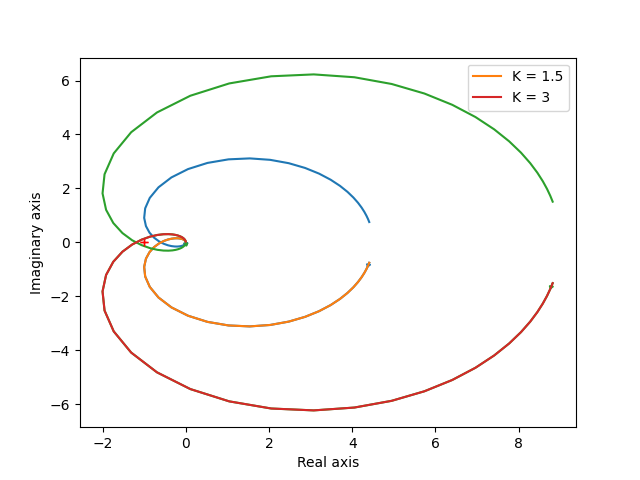

In [35]:
# Nyquist plots
Kc = [1.5, 3]
fig, ax = plt.subplots()
for K in Kc[ :2: ]:
    # Loop gain
    L = G*K
    # plot
    re, im, om = mt.nyquist(L)
    plt.plot(re, im, label='K = {}'.format(K))
plt.legend();


According to Nyquist: #CL RHP poles = #OL RHP poles + #CCW encirclements of -1 => K = 1.5 stable, K = 3 unstable (2 RHP poles!) 

## 5) Reproduce Figure 2.7. Also plot S, T in the same graph. What did you learn?


<IPython.core.display.Javascript object>


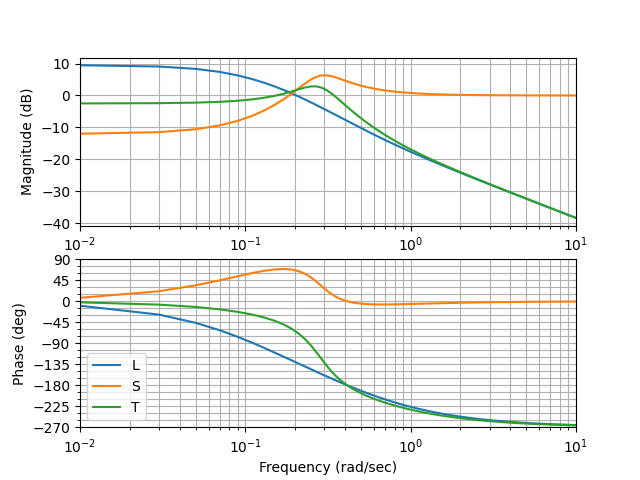

In [43]:
# Plant 
L = G
S = mt.feedback(1, L)
T = mt.feedback(L, 1)
# Bode plot L, T, S
fig, ax = plt.subplots()
w = np.linspace(1e-2, 1e1, 500)
mt.bode(L, S, T, w)
plt.xlim(1e-2, 1e1)
plt.ylim(-270, 90);
plt.legend(('L', 'S', 'T'))

**Note at Phase$=-180^{\circ}$, we have K=-7.8dB=$10^{-7.8/20}=0.4$ => system becomes unstable for gain K = GM = 1/0.4=2.5** Based on inspection of S, T: the system doesn't track that well (S not small enough!)

In [44]:
10**(-7.8/20)

0.40738027780411273

In [45]:
1/0.4


2.5